<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 1

This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [2]:
## Reading the data

sleepds = '/Users/sammanning/Desktop/ECON628-01-sjmanning/midterm/datasets/sleep/sleep_bh.csv'

sleep3 = pd.read_csv(sleepds)

In [3]:
sleep3.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [4]:
sleep3.tail()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916
705,30,0,706,0.182331,0.030075,16,6750,1,0,4747,...,0,2363,0,2363,0,8,1,9,NaN,900


In [5]:
## Checking types of values for each variable/column
sleep3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [6]:
## Identifying which variables have missing values

sleep3.isnull().sum(axis=0)

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [7]:
## It looks like lhrwage and hrwage both have missing values.

In [8]:
## Printing the indices (rows) where lhrwage is null

sleep3.loc[sleep3['lhrwage'].isnull()]

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
532,34,0,533,0.182331,0.030075,17,0,1,0,3922,...,0,2443,0,2403,40,11,0,14,NaN,1156
533,44,1,534,0.182331,0.030075,15,0,1,0,5635,...,0,995,0,995,0,23,0,22,NaN,1936
534,58,0,535,0.182331,0.030075,15,0,1,0,4370,...,0,1975,0,1975,0,37,0,29,NaN,3364
535,29,0,536,0.182331,0.030075,16,13750,1,0,4672,...,1,1313,0,1313,0,7,0,5,NaN,841
536,39,0,537,0.182331,0.030075,12,9500,1,0,3310,...,0,4000,0,4000,0,21,0,20,NaN,1521
537,41,0,538,0.182331,0.030075,17,42500,1,0,3802,...,1,3518,0,3518,0,18,0,18,NaN,1681
538,55,0,539,0.182331,0.030075,12,9500,1,0,5792,...,1,188,0,188,0,37,0,26,NaN,3025
539,28,0,540,0.182331,0.030075,12,10500,1,0,7280,...,1,0,0,0,0,10,1,10,NaN,784
540,41,0,541,0.182331,0.030075,12,0,1,0,3777,...,0,3438,0,3438,0,23,0,21,NaN,1681
541,46,0,542,0.182331,0.030075,8,9500,1,0,5500,...,1,1150,0,1150,0,32,0,28,NaN,2116


In [9]:
## Printing the indices where hrwage is null

sleep3.loc[sleep3['hrwage'].isnull()]

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
532,34,0,533,0.182331,0.030075,17,0,1,0,3922,...,0,2443,0,2403,40,11,0,14,NaN,1156
533,44,1,534,0.182331,0.030075,15,0,1,0,5635,...,0,995,0,995,0,23,0,22,NaN,1936
534,58,0,535,0.182331,0.030075,15,0,1,0,4370,...,0,1975,0,1975,0,37,0,29,NaN,3364
535,29,0,536,0.182331,0.030075,16,13750,1,0,4672,...,1,1313,0,1313,0,7,0,5,NaN,841
536,39,0,537,0.182331,0.030075,12,9500,1,0,3310,...,0,4000,0,4000,0,21,0,20,NaN,1521
537,41,0,538,0.182331,0.030075,17,42500,1,0,3802,...,1,3518,0,3518,0,18,0,18,NaN,1681
538,55,0,539,0.182331,0.030075,12,9500,1,0,5792,...,1,188,0,188,0,37,0,26,NaN,3025
539,28,0,540,0.182331,0.030075,12,10500,1,0,7280,...,1,0,0,0,0,10,1,10,NaN,784
540,41,0,541,0.182331,0.030075,12,0,1,0,3777,...,0,3438,0,3438,0,23,0,21,NaN,1681
541,46,0,542,0.182331,0.030075,8,9500,1,0,5500,...,1,1150,0,1150,0,32,0,28,NaN,2116


In [10]:
## It looks like all rows with case between 533 and 706 had missing values.

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [11]:
## Dropping rows based on case number

sleep3 = sleep3[((sleep3.case < 533) | (sleep3.case > 706))]

In [12]:
sleep3.isnull().sum(axis=0)

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

In [13]:
sleep3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 34 columns):
age         532 non-null int64
black       532 non-null int64
case        532 non-null int64
clerical    532 non-null float64
construc    532 non-null float64
educ        532 non-null int64
earns74     532 non-null int64
gdhlth      532 non-null int64
inlf        532 non-null int64
leis1       532 non-null int64
leis2       532 non-null int64
leis3       532 non-null int64
smsa        532 non-null int64
lhrwage     532 non-null float64
lothinc     532 non-null float64
male        532 non-null int64
marr        532 non-null int64
prot        532 non-null int64
rlxall      532 non-null int64
selfe       532 non-null int64
sleep       532 non-null int64
slpnaps     532 non-null int64
south       532 non-null int64
spsepay     532 non-null int64
spwrk75     532 non-null int64
totwrk      532 non-null int64
union       532 non-null int64
worknrm     532 non-null int64
workscnd    532 non

In [14]:
sleep3.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [15]:
## Making it so if I want to print something I can see 533 rows worth of entries.

pd.set_option('display.height', 533)
pd.set_option('max_rows', 533)

height has been deprecated.



In [16]:
## Printing values of binary variables to see if they are 0 and 1 only
print sleep3.inlf
print sleep3.black
print sleep3.clerical
print sleep3.construc
print sleep3.gdhlth
print sleep3.smsa
print sleep3.male
print sleep3.marr
print sleep3.prot
print sleep3.selfe
print sleep3.south
print sleep3.spwrk75
print sleep3.union
print sleep3.yngkid


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [17]:
## Yes, I scrolled through that whole thing. All of the binary variables are either 0 or 1. 

## 3. Check for correlations
    Implement a heatmap
---

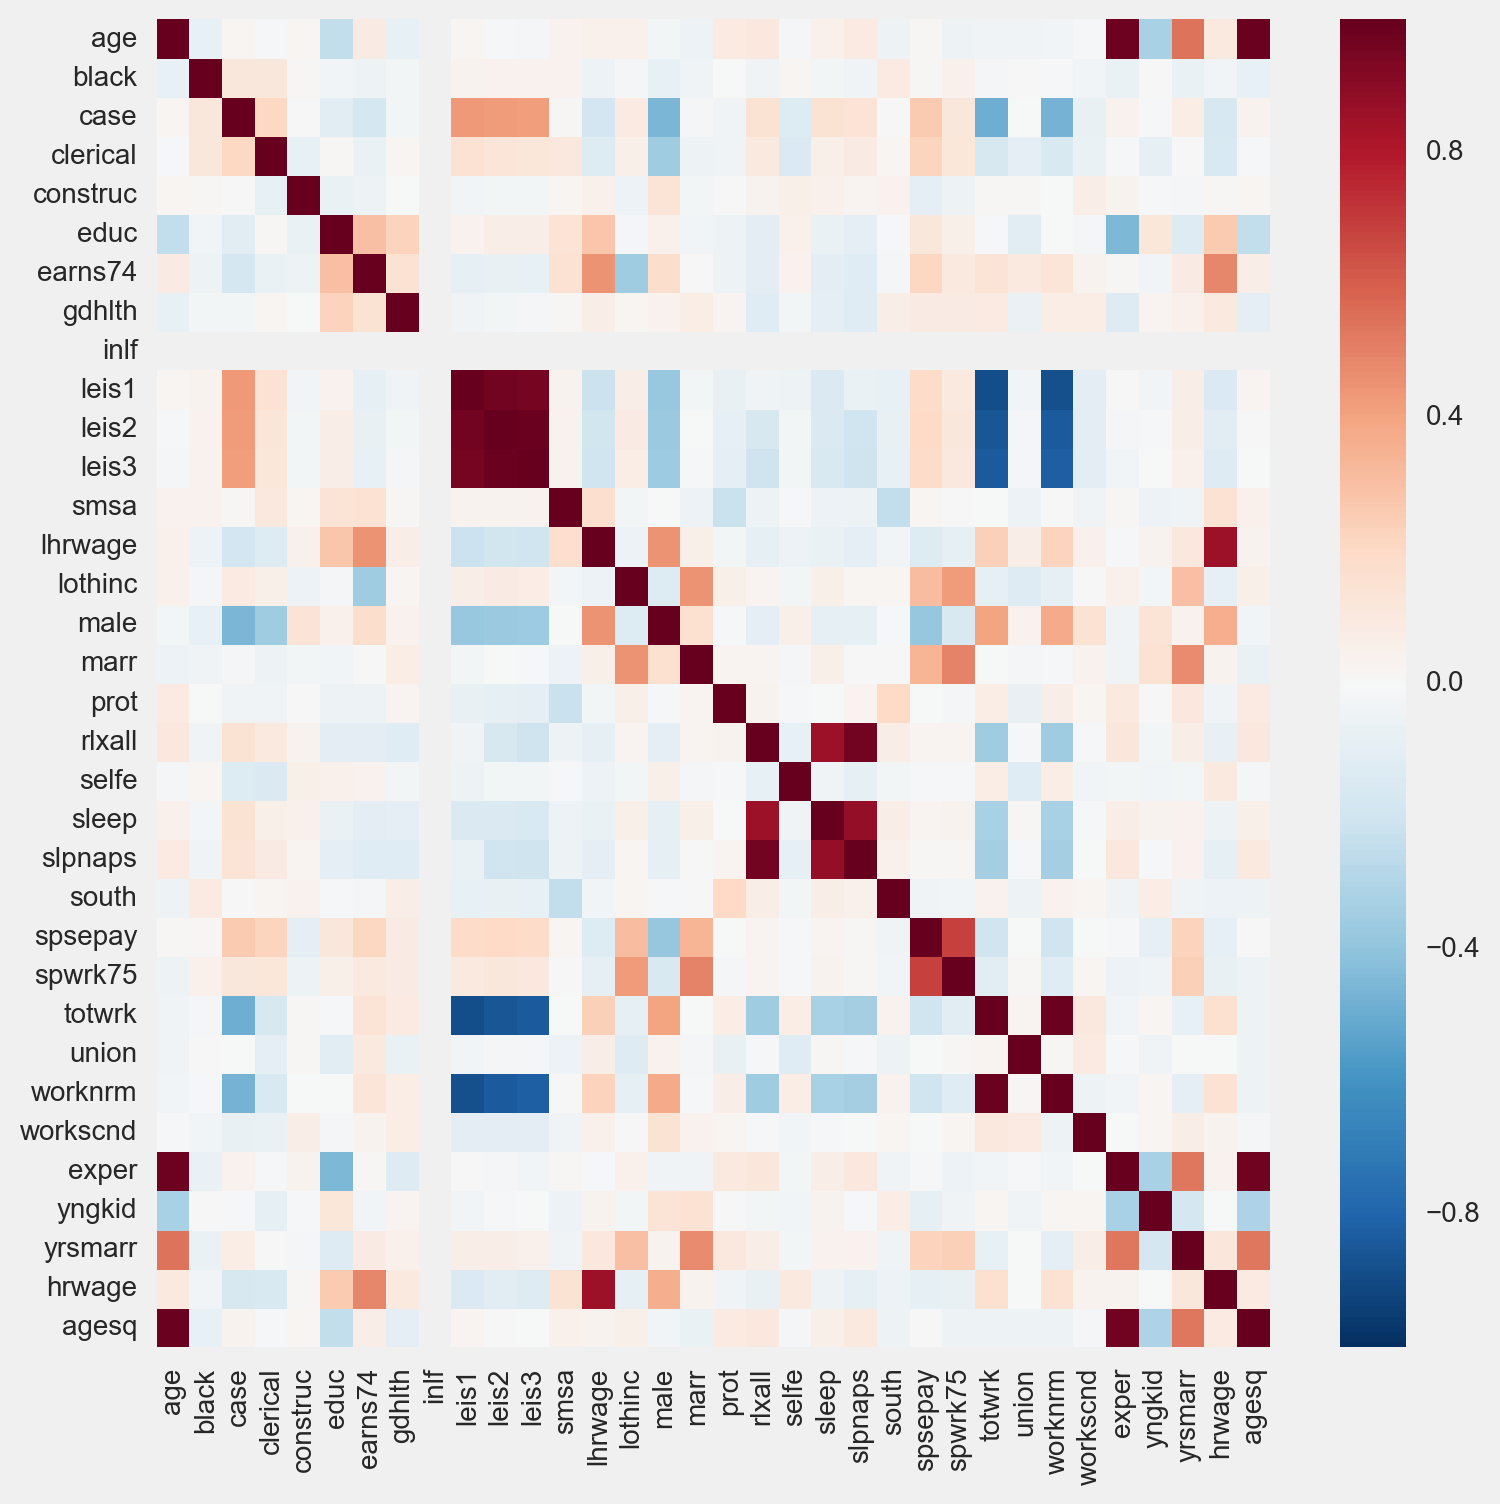

In [18]:
## Code adapted from Mario Carillo's Full Analysis notebook

fig = plt.figure(figsize=(8,8))
ax = fig.gca()

sns.heatmap(sleep3.corr(), ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [19]:
##Defining y
y = sleep3['sleep'] 
print type(y)

##Defining predictors, X
## I am choosing these variables to be my X's because they show a positive correlation to sleep
## on the heatmap that I plotted (even though many of them show weak positive correlations). 
## I excluded slpnaps due to severe multicollinearity concerns with rlxall.

X = sleep3[['rlxall', 'marr', 'south', 'age', 'exper', 'construc', 'clerical']]
print type(X)

print X.shape, y.shape

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(532, 7) (532,)


In [20]:
## Code below from Mario Carillo's OLS_regularization demo notebook

## Standardizing X's

formula1 = '''
sleep ~ rlxall, marr, south, age, exper, construc, clerical -1
'''
formula1 = formula1.replace(",", "+")

In [21]:
from patsy import dmatrices
import patsy
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

y, X = patsy.dmatrices(formula1, data=sleep3, return_type="dataframe")
y = np.ravel(y)


# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

print (y.shape)
print ("\n=====\n")
print (Xn.shape)

(532,)

=====

(532, 7)


In [22]:
## Train-test splitting data
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372, 7) (372,)
(160, 7) (160,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [23]:
# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [24]:
# Define linear model 
lm = linear_model.LinearRegression() 

# Fit linear model
model = lm.fit(X, y)

# Predict y, call them predictions, print the shape of predictions
# Print the shape of predictions
predictions = lm.predict(X)
predictions.shape

(532,)

In [25]:
## Check to see if there is a difference between the means for actual values (sleep) 
## and your predictions

print sleep3['sleep'].mean()
print predictions.mean()

3259.46616541
3259.46616541


In [26]:
## Nice, no difference. 

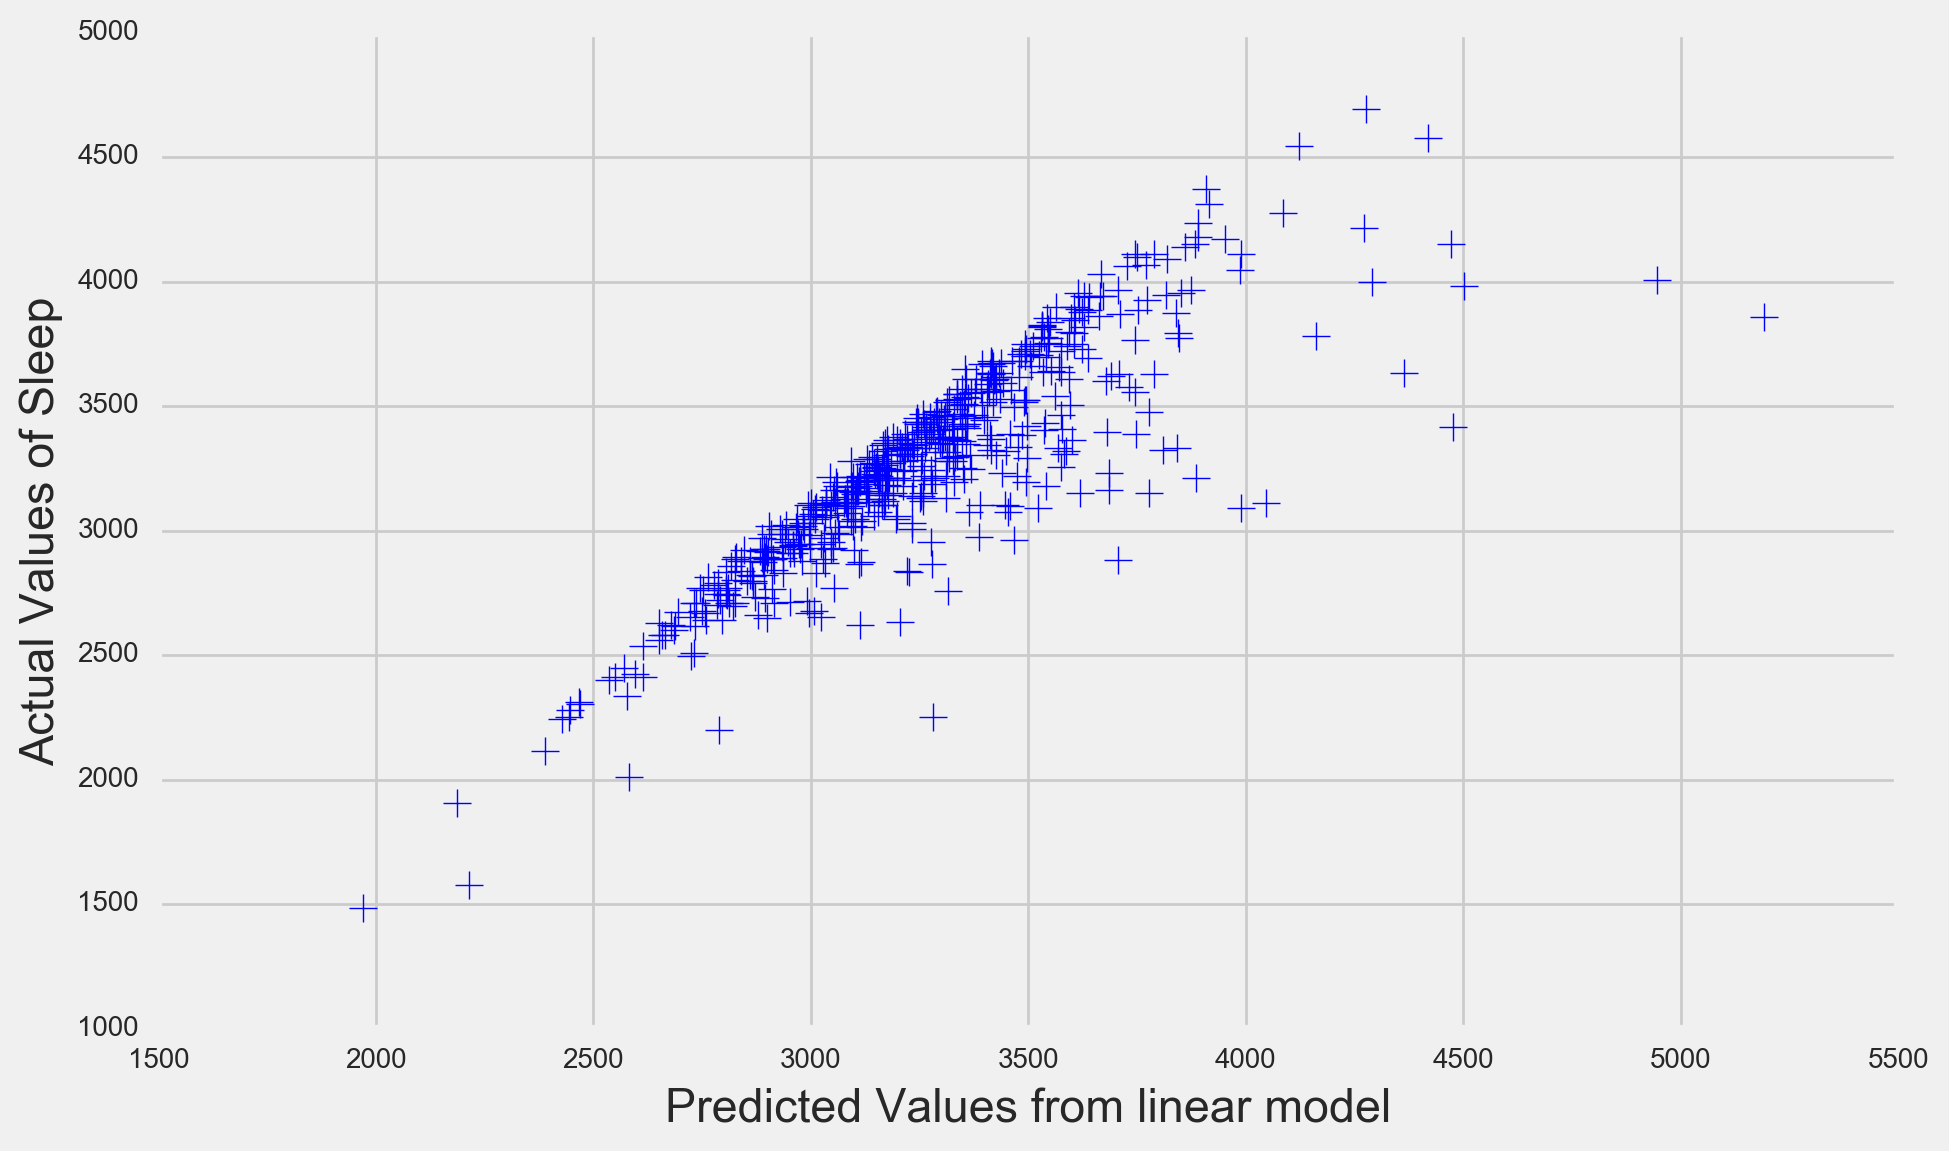

MSE: 49057.9504211


In [27]:
## Code from linear regression lab

## Construct a scatter plot of your model. Predicted values are on y axis and 
## y values are on x axis


fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from linear model")
plt.ylabel("Actual Values of Sleep")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [28]:
## Printing R^2 for linear model
score_r2 = model.score(X, y)
score_r2

0.73537759234539701

In [29]:
from sklearn.cross_validation import cross_val_score

In [30]:
linreg_scores = cross_val_score(lm, X_train, y_train, cv=10)

## Print average R^2 after CV
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.79095262  0.80937332  0.61995764  0.8171738   0.67660896  0.8218223
  0.7625539   0.6463115   0.55585967  0.87984932]
Average R^2 OLS score: 0.738


In [32]:
## Printing estimated coefficients of the model.
model.coef_


array([  0.71564932,  41.80389922,   9.97062153,   2.43205941,
        -3.47504461,  55.32733261, -22.8377982 ])

In [33]:
## Printing the intercept of the model.
lm.intercept_

745.74113310064695

In [34]:
## Importing for later

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## 4.2.2 Regularization
    
---

In [35]:
## Much of the code in this section taken from Mario Carillo's OLS Regularization demo

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [36]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

20970.4640132


In [37]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)
# print(ridge.coef_)
# print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[ 0.7967539   0.81054557  0.61170319  0.81359544  0.66810714  0.82426978
  0.78090912  0.64569123  0.58576268  0.88275891]
Average R^2 Ridge score: 0.742


In [38]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_ridge),
        mean_squared_error(y_test, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_ridge),
        r2_score(y_test, ytest_pred_ridge)))

MSE - Ridge train: 45829.071, test: 58384.323
R^2 - Ridge train: 0.756, test: 0.673


In [39]:
## Time for a lasso

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

195.701157807


In [40]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)
ytrain_pred_lasso = lasso.predict(X_train)
ytest_pred_lasso = lasso.predict(X_test)
print(lasso.coef_)
print "====\n"

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[ 0.72535902  0.          0.         -0.         -0.59104496  0.         -0.        ]
====

[ 0.78816711  0.80878286  0.61434906  0.81337373  0.67060792  0.82849987
  0.77407521  0.6394727   0.58316387  0.88532652]
Average R^2 Lasso score: 0.741


In [41]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_lasso),
        mean_squared_error(y_test, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_lasso),
        r2_score(y_test, ytest_pred_lasso)))

MSE - Lasso train: 46059.673, test: 58012.961
R^2 - Lasso train: 0.755, test: 0.675


In [42]:
## Time for an elastic net

l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(X_train, y_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

195.701157807
1.0


.................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   15.5s finished


In [43]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

## predict
ytrain_pred_enet = enet.predict(X_train)
ytest_pred_enet = enet.predict(X_test)
print(enet.coef_)
print "=====\n"

## Cross validate the scores and print the mean of the scores
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

[ 0.72535902  0.          0.         -0.         -0.59104496  0.         -0.        ]
=====

[ 0.78816711  0.80878286  0.61434906  0.81337373  0.67060792  0.82849987
  0.77407521  0.6394727   0.58316387  0.88532652]
Average R^2 ElasticNet score: 0.741


In [44]:
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_enet),
        mean_squared_error(y_test, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_enet),
        r2_score(y_test, ytest_pred_enet)))

MSE - ElasticNet train: 46059.673, test: 58012.961
R^2 - ElasticNet train: 0.755, test: 0.675


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

rlxall marr south age exper construc seem to be the best predictors of mins sleep at night, since they all have coefficients greater than 0. 

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [45]:
## Much of the code in this section taken from Mario Carillo's Random 
## Forest Demo notebook

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [46]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [47]:
## dtr_best = is the regression tree regressor with best parameters/estimators
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 5}


best score 0.747414627399


In [48]:
## Here I am defining a function to print feature importance using best models
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [49]:
feature_importance(X, dtr_best)

,feature,importance
0,rlxall,0.970256
4,exper,0.022246
3,age,0.005286
6,clerical,0.002212
1,marr,0.000000
2,south,0.000000
5,construc,0.000000


rlxall is clearly still a very important feature, driving most of the predicitve power here.  Exper, age, and clerical have some importance, but it is very low. Marr, south, and construc are not important.

This is similar to what we found in the OLS and regularization method, although this method shows more clearly the difference in importance between the X's, specifically how much more important rlxall is to the model. 

In [50]:
y_pred_dtr= dtr_best.predict
y_pred_dtr

<bound method DecisionTreeRegressor.predict of DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>

In [51]:
## Function that calls the MSE and R^2 at once, using the name of the method and 
## calling the best model

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [52]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 27058.61, test data: 55815.69
R^2 Regression tree train data: 0.86, test data: 0.69


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [53]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [54]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [55]:
## rfr_best = is the random forest regression tree regressor with best parameters/estimators
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 4}


best score 0.716679558163


In [56]:
feature_importance(X, rfr_best)

,feature,importance
0,rlxall,0.932079
4,exper,0.031127
3,age,0.017404
6,clerical,0.007946
2,south,0.004425
1,marr,0.004022
5,construc,0.002997


In [57]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2847.36132252,  2910.58254553,  3429.58518758,  3055.86634112,
        3507.0914508 ,  3166.95232301,  3458.89990025,  3424.28834694,
        2878.1764835 ,  3433.13031859,  3150.10765739,  3651.52549255,
        2812.49657055,  3444.31895174,  3448.38443191,  3061.01077031,
        3192.28167317,  3195.84759854,  3033.6898167 ,  3049.48790556,
        3426.84443046,  3708.96781741,  3177.23952974,  3524.99149619,
        3476.50436863,  3473.84912672,  3049.2452838 ,  3527.48197053,
        3471.85037722,  3046.32740392,  3431.89674026,  3496.01939432,
        3102.22399514,  3710.37404465,  3429.76254796,  2941.272448  ,
        3710.16817791,  3774.4884278 ,  3461.19469971,  3488.30530237,
        2662.42141253,  3058.08353432,  3700.70043835,  3443.70275094,
        3276.30613   ,  3469.14705748,  2877.82072329,  3506.78508409,
        3750.16298704,  3159.83630119,  3153.23843683,  3170.66503397,
        3511.34647887,  3072.49560967,  2878.60363429,  3473.80124877,
      

In [58]:
## Evaluating performance of the model

rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 42448.89, test data: 63188.71
R^2 Random Forest Regression tree train data: 0.77, test data: 0.65


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In my opinion the Lasso model and Elastic Net models performed best, because both had R-squared and MSE values that were closest to each other when I ran the models on the test and train data. I choose both, and not just one model, because they both had identical MSE and r-squared results. The difference between the MSE (test-train) was 11953.288, which was the smallest difference between test and train for all of the models that I ran. The same is true for R-squared, which yielded a difference (train-test) of 0.08.

6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:

Yes, there was some tradeoff between bias and variance in the models. The OLS model that I ran suffered from moderate multicollinearity (hence higher variance) while the Lasso, Ridge, Elastic Net, and Random Forest models suffered from slightly higher bias. 

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

Both the Lasso and Elastic Net models add bias to the model, but they help decrease variance by adding constraints to the end of the model. In the case of the Lasso method, it adds the sum of the absolute value of the beta coefficients to the loss function of the model. The Elastic net takes the constraint added in the Lasso method, and adds an additional constraint - the sum of squared coefficients (which is used as the only constraint in a Ridge regression loss function). 

In this case, the OLS method suffered from moderate multicollinearity (and hence higher variance), and the Lasso and Elastic net methods were able to solve for this issue (despite adding bias to the model).